In [ ]:
!nvidia-smi

Sun Jan 30 09:29:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# To do list:
1. Before you running this file you must agumentation image data first because we need more and more data about what we want the machine learn. For agumentation, I have a file name 'Agumentation_image.py' and you can run it with a dataset i have upload in this folder name 'Dataset'.
2. Affer agumentation, you need to label the raw data by LabelImg

# DARKNET


In [ ]:
# darknet path
path = '/content/drive/MyDrive/Code/LicensePlateDetection/darknet'

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Code/LicensePlateDetection')

In [ ]:
cd darknet

/content/drive/MyDrive/Code/LicensePlateDetection/darknet


In [ ]:
import numpy as np
list_files = os.listdir('data/Save_image/')
list_imgs = []
for file in list_files:
  if '.txt' not in file:
    list_imgs.append(file)
print(len(list_imgs))

701


In [ ]:
# Setup random image for validation set
random_index = np.random.randint(0, len(list_imgs), int(len(list_imgs)*0.2))
print(random_index)

[610 161  61 350 553 275 224 303 658  13 630 117 539  96 124  64 215 284
 114 113 447 628  54 107 209  34 518 240 232 195  32 561 526 135 409  91
  68 665 301 627 236 410  49 549 577 208 100 105 440 669 107 219 593 278
  68 186 436 301 302 484 256 363 230 434 617  16 550 183 483 473 663 481
 263  72  44 325 272  27 200 332  44 482  98 285 633 334 205 382 170 415
 412  89 154 231 236 632 666 397 525 276 172 541 609 390 509 594 548  95
  72 555   3 688 276 690 252 330 123 177 561 695 125 641 470 603 123 137
  13 630 460  62 135 573 240 640  14 376 256  97 145  77]


In [ ]:
# Save the training image
import pandas as pd
with open('data/train.txt', 'w') as f:
  for index in range(len(list_imgs)):
    if index not in random_index:
      f.write('data/Save_image/' + list_imgs[index]+ '\n')

In [ ]:
train_df = pd.read_csv('data/train.txt', header=None)
train_df.info()
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       575 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB
                       0
0  data/Save_image/0.jpg
1  data/Save_image/1.jpg
2  data/Save_image/2.jpg
3  data/Save_image/4.jpg
4  data/Save_image/5.jpg


In [ ]:
# save the validation set
with open('data/valid.txt', 'w') as f:
  for index in random_index:
    f.write('data/Save_image/' + list_imgs[index] + '\n')

In [ ]:
val_df = pd.read_csv('data/valid.txt', header=None)
val_df.info()
print(val_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       140 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB
                         0
0  data/Save_image/619.jpg
1  data/Save_image/209.jpg
2  data/Save_image/109.jpg
3  data/Save_image/398.jpg
4  data/Save_image/675.jpg


In [ ]:
# Translate darknet
!make

chmod +x *.sh


In [ ]:
# Permission to execute the darknet module
!chmod +x ./darknet

In [ ]:
# Training
!./darknet detector train data/obj.data cfg/yolo-tinyv4-obj.cfg yolov4-tiny.conv.29 -map -dont_show > yolotinv4_lisenceplate.log

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.915815), count: 4, class_loss = 0.000224, iou_loss = 1.614624, total_loss = 1.614848 
 total_bbox = 643450, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.915435), count: 4, class_loss = 0.000073, iou_loss = 0.818018, total_loss = 0.818091 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.929589), count: 4, class_loss = 0.000018, iou_loss = 1.030442, total_loss = 1.030460 
 total_bbox = 643458, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.866552), count: 2, class_loss = 0.000001, iou_loss = 0.383430, total_loss = 0.383431 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.939654), count: 4, class_loss = 0.002782, iou_loss = 1.921000, total_loss = 1.923782 
 total_

In [ ]:
!ls backup/

yolo-tinyv4-obj_1000.weights  yolo-tinyv4-obj_6000.weights
yolo-tinyv4-obj_2000.weights  yolo-tinyv4-obj_best.weights
yolo-tinyv4-obj_3000.weights  yolo-tinyv4-obj_final.weights
yolo-tinyv4-obj_4000.weights  yolo-tinyv4-obj_last.weights
yolo-tinyv4-obj_5000.weights


In [ ]:
# Dự đoán 
!./darknet detector test data/obj.data cfg/yolo-tinyv4-obj.cfg \
 backup/yolo-tinyv4-obj_best.weights data/test_img.jpg


CUDA status Error: file: ./src/dark_cuda.c : () : line: 38 : build time: Jan 30 2022 - 09:24:09 

 CUDA Error: no CUDA-capable device is detected
Darknet error location: ./src/dark_cuda.c, check_error, line #69
CUDA Error: no CUDA-capable device is detected: Bad file descriptor


In [ ]:
def show(path):
  import cv2
  import matplotlib.pyplot as plt

  image = cv2.imread(path)
  original_width, original_height = image.shape[1], image.shape[0]
  resized_image = cv2.resize(image, (2*original_width, 2*original_height), interpolation = cv2.INTER_CUBIC)

  resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(20,10))
  plt.axis("off")
  plt.imshow(resized_image)
  plt.show()

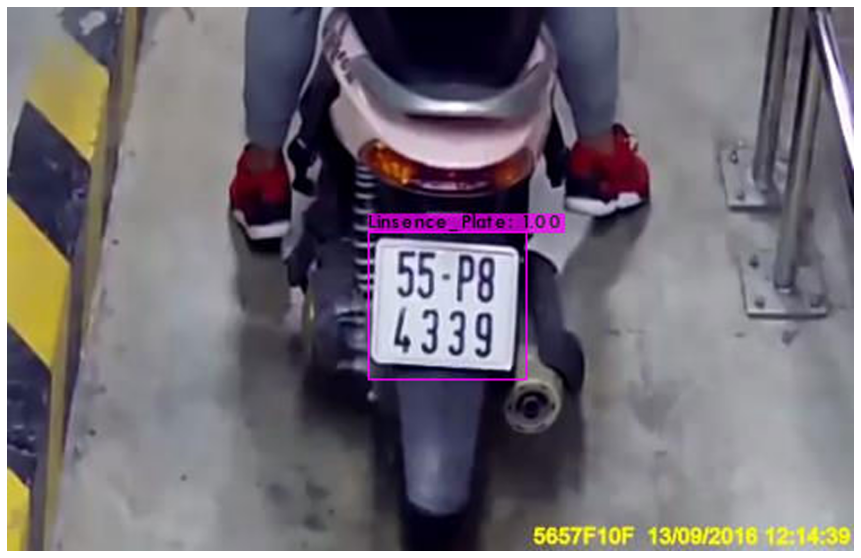

In [ ]:
show('predictions.jpg')

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('predictions.jpg')
# thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)

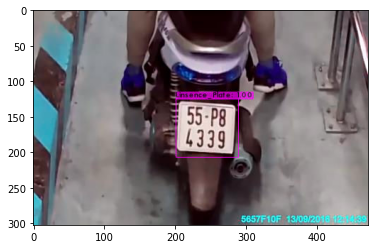

In [ ]:
plt.imshow(img)